# Kiva Crowd-Funding Data Visualization

In [1]:
from narcos.kiva_data import KivaData
import plotly.plotly as py

loan_data = KivaData(use_sample=True).loan_data

## Wordcloud

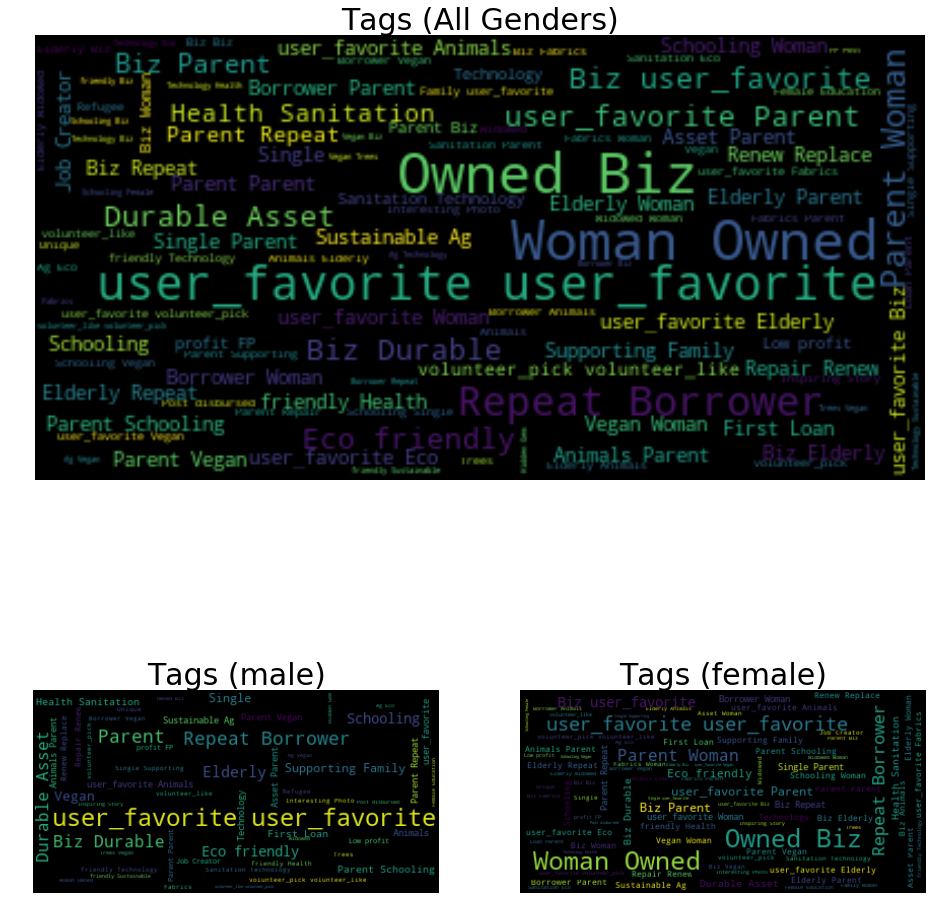

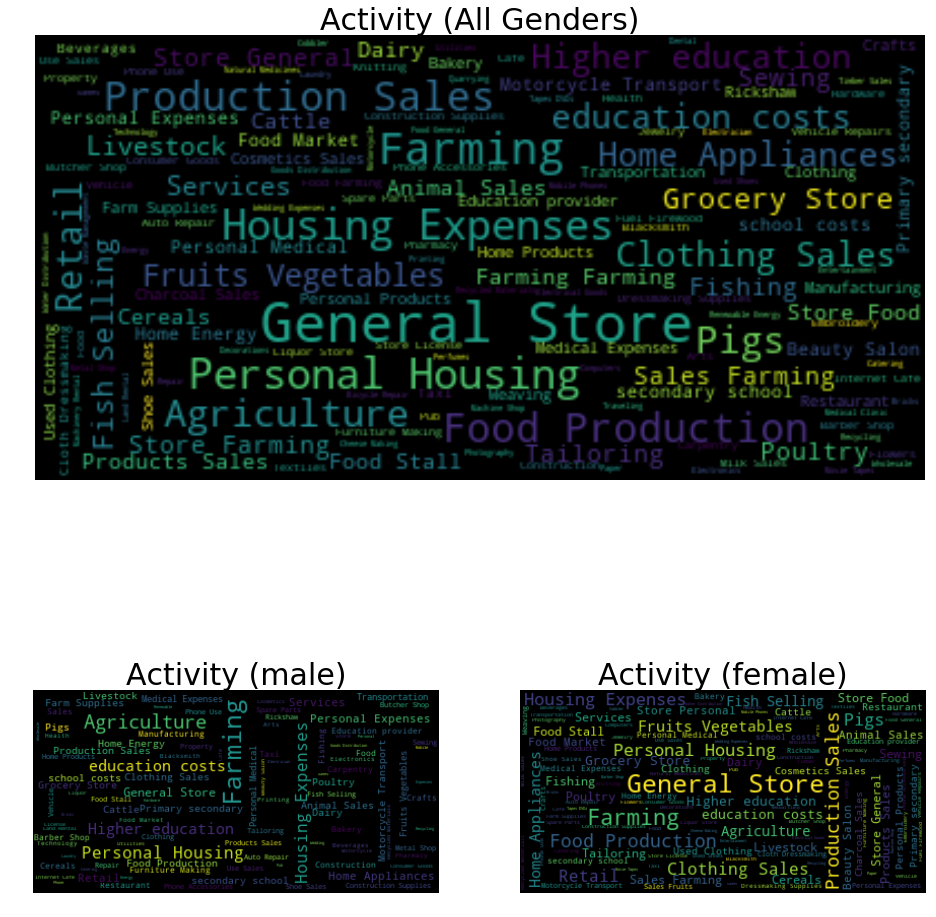

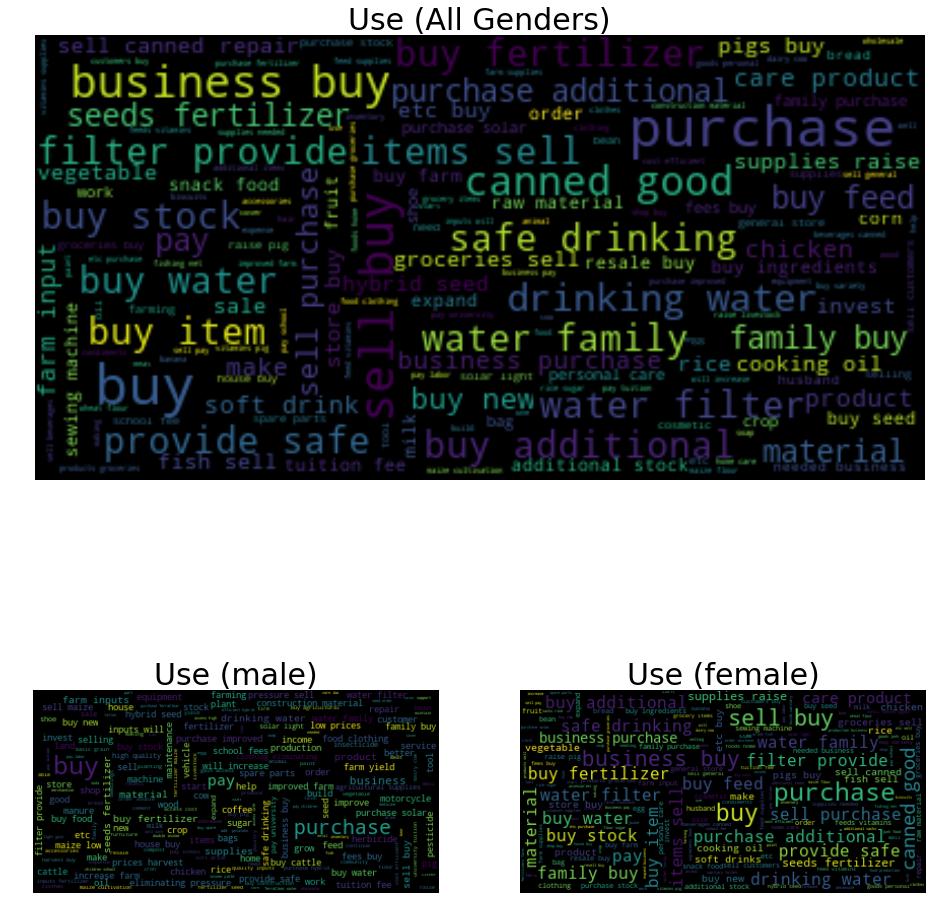

In [2]:
%run narcos/word_cloud.py
draw_wordcloud(loan_data)

## Map

In [2]:
%run narcos/map.py
fig= plot_map(loan_data)
py.iplot(fig, validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~feng443/0 or inside your plot.ly account where it is named 'd3-world-map'
